### 1. 什么是逻辑回归分类器

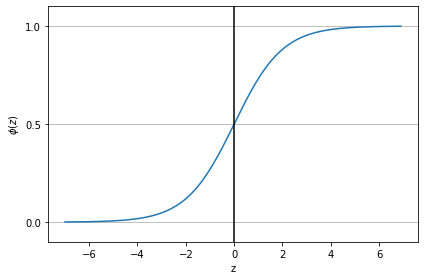

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

### 2. 什么是损失函数


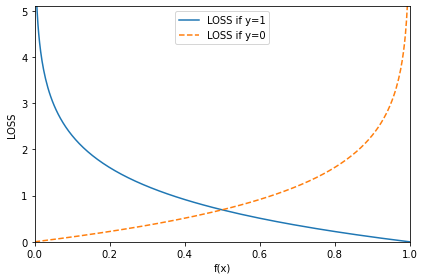

In [2]:
def cost_1(z):
    return - np.log(sigmoid(z))
                   
def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='LOSS if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='LOSS if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('f(x)')
plt.ylabel('LOSS')
plt.legend(loc='best')
plt.tight_layout()

In [3]:
import pandas as pd

df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [6]:
# use Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_std, y)

LogisticRegression()

In [7]:
new_x = np.array([[5.3, 1.2]])
lr.predict_proba(new_x)

array([[3.70164974e-04, 9.99629835e-01]])

In [8]:
w1, w2 = lr.coef_[0]
print("w1:",w1,"\n""w2:",w2)

w1: 0.6737453679915705 
w2: 3.240850914591852


In [9]:
b = lr.intercept_[0]
print("b:",b)

b: 0.4413199956841683


In [10]:
a = -w1/w2
line_x = np.linspace(-2,2,100)
line_y = line_x*a - b

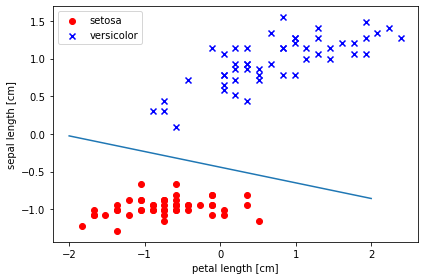

In [11]:
plt.scatter(X_std[:50, 0], X_std[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.plot(line_x,line_y)
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()


### 3. 逻辑回归的权重如何训练的

In [13]:
class LogisticRegression(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)
            self.w_[1:] += self.eta * neg_grad
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        return activation(X)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

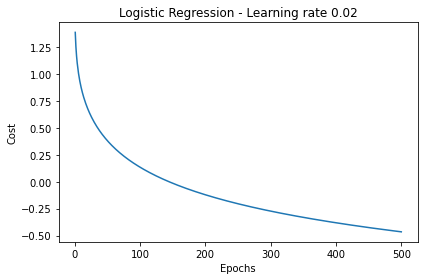

In [14]:

lr = LogisticRegression(n_iter=500, eta=0.02).fit(X_std, y)
plt.plot(range(1, len(lr.cost_) + 1), np.log10(lr.cost_))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.02')

plt.tight_layout()

### 4. 分类器的评估方法

In [20]:
from sklearn.model_selection import train_test_split
import sklearn

X_train, X_test, y_train, y_test = train_test_split(
         X_std, y, test_size=0.3, random_state=0)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(70, 2) (30, 2) (70,) (30,)


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_predict = lr.predict(X_test)
y_predict_prob = lr.predict_proba(X_test)

In [21]:
sklearn.metrics.accuracy_score(y_test,y_predict)

1.0

### 练习


In [22]:
def logit_cost(y, p):
    logit = -y.dot(np.log(p)) - ((1 - y).dot(np.log(1 - p)))
    return logit/len(y)

In [23]:
y_true = np.array([0, 0, 1, 1])
y_pred = np.array([0.1, 0.2, 0.7, 0.99])

In [24]:
logit_cost(y_true,y_pred)

0.17380733669106746

In [25]:
from sklearn.metrics import log_loss
log_loss(y_true, y_pred)

0.1738073366910675